In [86]:
#importing Core-Libraries & Exploratory Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

#importing pre-processing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split


#importing machine learning libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#performance metrics libraries
from sklearn.metrics import  roc_curve, auc, accuracy_score, f1_score, recall_score, precision_score

In [87]:
#importing & reading dataset
data = pd.read_csv('attributeDataset.csv')
data.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0


In [88]:
#checking missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dress_ID        500 non-null    int64  
 1   Style           500 non-null    object 
 2   Price           498 non-null    object 
 3   Rating          500 non-null    float64
 4   Size            500 non-null    object 
 5   Season          498 non-null    object 
 6   NeckLine        497 non-null    object 
 7   SleeveLength    498 non-null    object 
 8   waiseline       413 non-null    object 
 9   Material        372 non-null    object 
 10  FabricType      234 non-null    object 
 11  Decoration      264 non-null    object 
 12  Pattern Type    391 non-null    object 
 13  Recommendation  500 non-null    int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 54.8+ KB


In [89]:
#data dropping
df_dropped = data.drop(['Dress_ID', 'FabricType', 'Decoration', 'Material'], axis=1)
df_dropped = df_dropped.dropna()
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 499
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Style           342 non-null    object 
 1   Price           342 non-null    object 
 2   Rating          342 non-null    float64
 3   Size            342 non-null    object 
 4   Season          342 non-null    object 
 5   NeckLine        342 non-null    object 
 6   SleeveLength    342 non-null    object 
 7   waiseline       342 non-null    object 
 8   Pattern Type    342 non-null    object 
 9   Recommendation  342 non-null    int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 29.4+ KB


In [90]:
# Data Encording
encoder = OrdinalEncoder()
columns_to_encode = ['Style', 'Price', 'Size', 'Season', 'NeckLine', 'SleeveLength', 'waiseline', 'Pattern Type']
df_dropped[columns_to_encode] = encoder.fit_transform(df_dropped[columns_to_encode].astype(str))

In [91]:
#Reccomendations Class Distribution
rec_counts = data['Recommendation'].value_counts()
labels = 'Not-Recommended', 'Recommended'

fig = go.Figure(data=[go.Pie(labels=labels, values=rec_counts)])
fig.show()

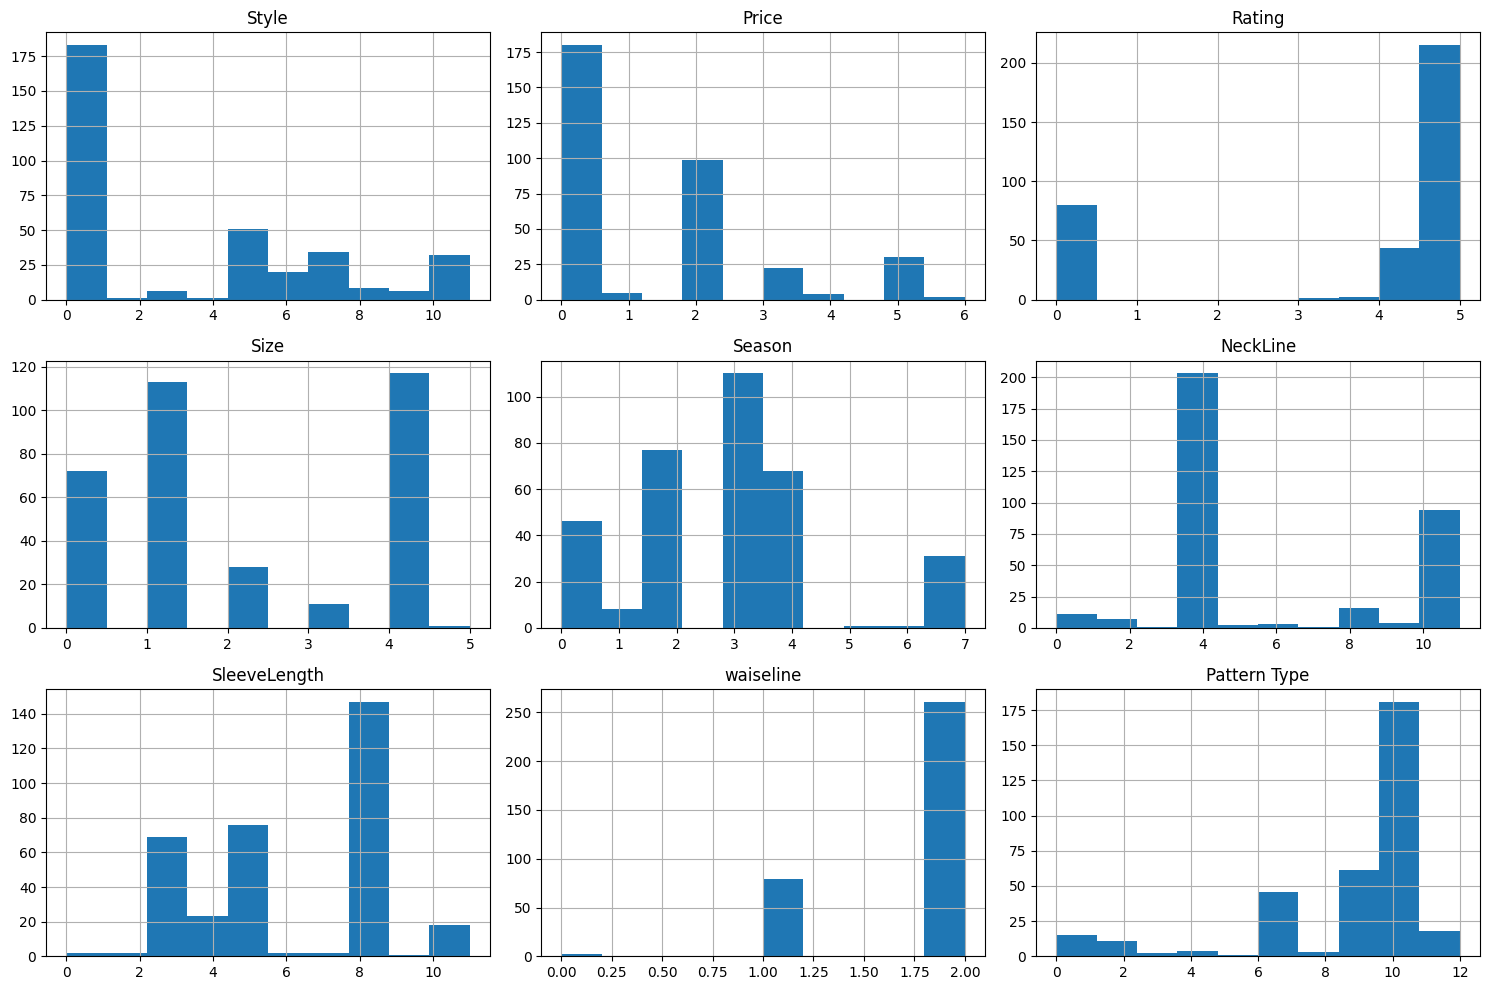

In [92]:
# Histograms for the distribution of each feature
features = df_dropped.drop(['Recommendation'], axis=1)
features.hist(bins=10, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [93]:
# Feature Scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [94]:
# Applying PCA
n_components_pca = 0.95
pca = PCA(n_components = n_components_pca)  
features_pca = pca.fit_transform(features_scaled)


explained_variance_ratio = pca.explained_variance_ratio_ * 100  
fig = px.bar(x=range(1, len(explained_variance_ratio)+1), y=explained_variance_ratio,
             labels={'x': 'Principal Component', 'y': 'Explained Variance (%)'},
             title='PCA - Explained Variance Ratio')
fig.show()

In [95]:
#cumulative explained variance
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

fig_cumulative = px.line(x=range(1, len(cumulative_explained_variance_ratio)+1), 
                         y=cumulative_explained_variance_ratio,
                         markers=True, 
                         labels={'x': 'Principal Component', 'y': 'Cumulative Explained Variance (%)'},
                         title='PCA - Cumulative Explained Variance Ratio')
fig_cumulative.show()


In [96]:
# Applying Kernel PCA with RBF kernel
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=int(pca.n_components_ * 1.5))
features_kpca = kpca.fit_transform(features_scaled)


eigenvalues = kpca.eigenvalues_
eigenvalues_df = pd.DataFrame({'Component': np.arange(1, len(eigenvalues) + 1), 'Eigenvalue': eigenvalues})


fig_eigenvalues = px.bar(eigenvalues_df, x='Component', y='Eigenvalue',
                             title='Kernel PCA Components vs. Eigenvalues',
                             labels={'Component': 'Kernel PCA Component', 'Eigenvalue': 'Eigenvalue'})
fig_eigenvalues.show()

In [97]:
#cumulative sum of the eigenvalues
cumulative_eigenvalues = np.cumsum(eigenvalues)
cumulative_eigenvalues_df = pd.DataFrame({
    'Component': np.arange(1, len(cumulative_eigenvalues) + 1),
    'Cumulative Eigenvalue': cumulative_eigenvalues
})


fig_cumulative_eigenvalues = px.line(cumulative_eigenvalues_df, x='Component', y='Cumulative Eigenvalue',
                                     markers=True,  # Add markers for each point
                                     title='Cumulative Eigenvalues of Kernel PCA Components',
                                     labels={'Component': 'Kernel PCA Component', 'Cumulative Eigenvalue': 'Cumulative Eigenvalue'})
fig_cumulative_eigenvalues.show()

In [98]:
# Splitting the dataset for PCA and KPCA transformed data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(features_pca, df_dropped['Recommendation'], test_size=0.2, random_state=42)
X_train_kpca, X_test_kpca, y_train_kpca, y_test_kpca = train_test_split(features_kpca, df_dropped['Recommendation'], test_size=0.2, random_state=42)

In [99]:
# Machine Learning Classification Models 
models = {
    "Support Vector": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
}

In [100]:
# Train and evaluate models
results = {}

for model_name, model in models.items():
    for X_train, X_test, y_train, y_test, feature_set in [
        (X_train_pca, X_test_pca, y_train_pca, y_test_pca, "PCA"),
        (X_train_kpca, X_test_kpca, y_train_kpca, y_test_kpca, "KPCA"),
    ]:
        model.fit(X_train, y_train)  
        y_pred = model.predict(X_test)  
        accuracy = accuracy_score(y_test, y_pred) 
        f1_scores = f1_score(y_test, y_pred, average="macro")
        recall = recall_score(y_test, y_pred, average="macro")
        precision = precision_score(y_test, y_pred, average="macro", zero_division=0)
        probas = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, probas) 
        auc_value = auc(fpr, tpr) 
                
        results[f"{model_name} + {feature_set}"] = {
            "accuracy_score": accuracy,
            "f1_score" : f1_scores,
            "recall_score": recall,
            "precision_score": precision,
            "roc_curve": {"fpr": fpr, "tpr": tpr},
            "auc": auc_value
        }


In [101]:
#Performance Metrics
df_results = pd.DataFrame.from_dict(results, orient='index')

df_results.reset_index(inplace=True)
df_results.rename(columns={'index': 'Model'}, inplace=True)

columns_to_display = ['Model', 'accuracy_score', 'f1_score', 'recall_score', 'precision_score']
performance_metrics = df_results[columns_to_display]
performance_metrics

,Model,accuracy_score,f1_score,recall_score,precision_score
0,Support Vector + PCA,0.623188,0.417532,0.518519,0.808824
1,Support Vector + KPCA,0.608696,0.378378,0.500000,0.304348
2,Decision Tree + PCA,0.449275,0.393056,0.402116,0.389881
3,Decision Tree + KPCA,0.623188,0.511438,0.544974,0.594444
4,Naive Bayes + PCA,0.565217,0.436275,0.484127,0.466667
5,Naive Bayes + KPCA,0.376812,0.291039,0.474868,0.356061


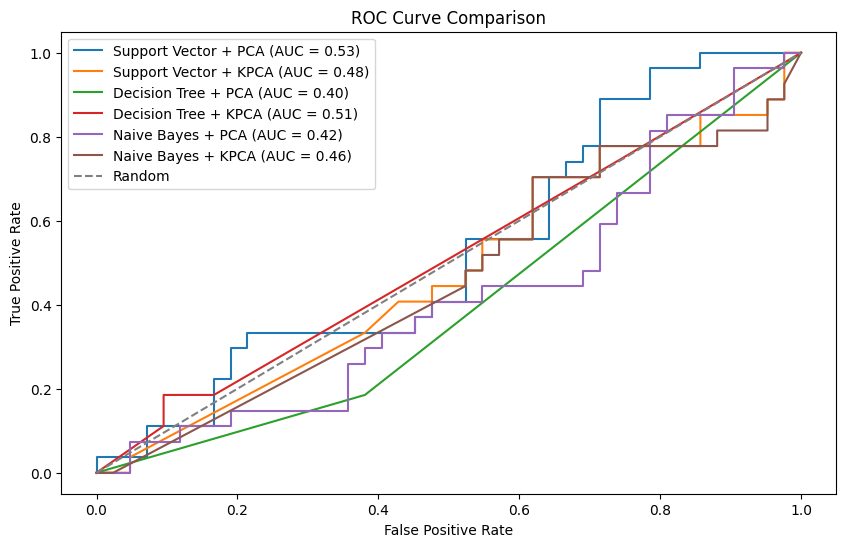

In [102]:
# Display ROC curves
plt.figure(figsize=(10, 6))
for name, metrics in results.items():
    plt.plot(metrics['roc_curve']['fpr'], metrics['roc_curve']['tpr'], label=f"{name} (AUC = {metrics['auc']:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()